In [ ]:
"""
Summary:

A Self-Organizing Map is an unsupervised learning algorithm that reduces the dimensionality of a dataset.
It's a neural network at it's core, but it doesn't function in the same way that artificial neural networks
(CNN's and RNN's) do(They are supervised learning algo's).It's weights  are characteristics of the hidden nodes
(so no activation functions are used. We're also not forward propagating to update new features
and backward propagating to update our weights and correct our learning errors.) The learning methodology is completely different
and less complex. It simply calculates the euclidean  distances between the nodes and the inputs, chooses the nodes that had
the shortest distance, update its weights (and the neighbors under its radius), and then(after a series of iterations)
forms clusters. They're are capable of learning correlations in the data that aren't easily identified and are capable 
of retaining the datas topology.



To learn more about SOM's you can check these links out:
- http://www.ai-junkie.com/ann/som/som1.html
- http://sci2s.ugr.es/keel/pdf/algorithm/articulo/1990-Kohonen-PIEEE.pdf



"""

In [1]:
import numpy as np
import pandas as pd

# Self-Organizing Maps visualization tools
from pylab import pcolor,colorbar,bone,plot,show

# Natural Languange Processing library - Used to clean the texts
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#Importing the dataset
dataset = pd.read_csv("openreg_dataset.csv")
text = dataset.iloc[:,2].values
text = list(text)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdul_000.HP1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#Removing NaN (empty spaces) in the list of articles
#Ignore error
for i in range(len(text)):
    if type(text[i]) == float:
        text.pop(i)
    
#testing text
print(text[0])

Story highlights More than 77,000 infections have been registered this year

The health minister blames a garbage crisis in the country's capital

(CNN) A deadly outbreak of dengue fever has ravaged the island nation of Sri Lanka, killing at least 227 people and infecting tens of thousands.

Experts worry the death toll could yet increase, as the country's health infrastructure struggles to cope with the virus' rapid spread.

"Dengue will get worse as flood waters recede further," Health Minister Rajitha Senaratne said in comments made to state-owned media outlet Daily News.

The government has deployed 450 troops in a bid to help combat the spread of the disease.

"We are assisting health inspectors to search for dengue breeding areas and have also set up temporary wards at the Negombo Hospital on the outskirts of Colombo to tackle the issue," Sri Lankan Army spokesman Brigadier Roshan Senevirathana told CNN.


In [9]:
#Declaring the stemming object
ps = PorterStemmer()

cleaned_text = []

# Creating the clean version
for i in range(len(text)):
    newver = re.sub('[^a-zA-z]',' ', text[i])
    newver = newver.lower()
    newver = newver.split()
    newver = [ps.stem(word) for word in newver if not word in stopwords.words('english')]
    newver = ' '.join(newver)
    cleaned_text.append(newver)
    
#Compare the clean version to the one showcased above
print(cleaned_text[0])

stori highlight infect regist year health minist blame garbag crisi countri capit cnn deadli outbreak dengu fever ravag island nation sri lanka kill least peopl infect ten thousand expert worri death toll could yet increas countri health infrastructur struggl cope viru rapid spread dengu get wors flood water reced health minist rajitha senaratn said comment made state own media outlet daili news govern deploy troop bid help combat spread diseas assist health inspector search dengu breed area also set temporari ward negombo hospit outskirt colombo tackl issu sri lankan armi spokesman brigadi roshan senevirathana told cnn


In [11]:
#Creating a sparce matrix to prepare input for the Self-Organizing Maps input nodes.
#Similar to what we did in clustering
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 100000)
X = cv.fit_transform(cleaned_text).toarray()
print(X)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [17]:
# Self Organizing Maps
from minisom import MiniSom
# Parameters = SOM grids dimensions(20,20) - Number of input nodes (= to input features) 
# sigma = radius surrounding the best matching unit (Gets smallers as you get closer to convergence)
# Learning rate = how fast the SOM learn the clusters
som = MiniSom(20,20,input_len = 14059, sigma = 1, learning_rate = 0.5 )

# Initializing the weights
# Note: the weights in SOMs represent the characteristics of the nodes
som.random_weights_init(X)
# training the model
#parameters = data and number of iterations
som.train_random(X,1000)

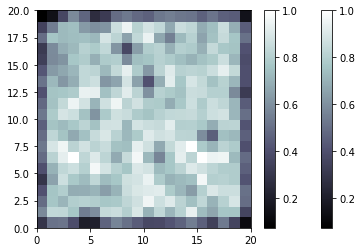

In [19]:
#Building the SOM graph
# The legend meter: 0(black cell): Mean interneuron distances is really small between the winning node and it's neighbors
# 1(white cell) = Mean interneuron distances is huge between the winning node and it's neighbors
# Usually means that the general rule isn't being followed and that there is an unusual relationship
# between the clusters at hand (sometimes interpreted as an anomaly)
bone()
pcolor(som.distance_map().T)
colorbar()
show()



In [26]:
# The clusters in the best winning nodes (Best matching units)
mappings = som.win_map(X)

#Extracting a specific cluster
cluster = mappings[(0,0)]

In [27]:
#transformering the words back to their original format (numbers to actual text)
cluster_text = cv.inverse_transform(cluster)
print(cluster_text)
# I recommend using spyder IDE as you can easily access/explore all the results saved in the variables you created 

[array(['acquir', 'ad', 'add', 'addit', 'ag', 'agre', 'allianc', 'alreadi',
       'also', 'analyst', 'anymor', 'apart', 'area', 'autonom', 'base',
       'batteri', 'behind', 'benefit', 'benz', 'bnp', 'brand', 'build',
       'car', 'carlo', 'carmak', 'ceo', 'chief', 'citi', 'click', 'closer',
       'co', 'collabor', 'come', 'compani', 'confer', 'cooper', 'cost',
       'counterpart', 'creat', 'daimler', 'decis', 'deficit', 'develop',
       'dieter', 'discuss', 'display', 'divis', 'drift', 'drive', 'easili',
       'electr', 'engin', 'entrant', 'eq', 'establish', 'exan', 'execut',
       'expand', 'fast', 'fight', 'fine', 'focu', 'follow', 'forc',
       'foundat', 'french', 'friday', 'fruit', 'fund', 'german', 'get',
       'ghosn', 'hang', 'herecarmak', 'high', 'hold', 'inc', 'includ',
       'increasingli', 'industri', 'introduc', 'japanes', 'join', 'law',
       'like', 'limit', 'line', 'longer', 'look', 'lot', 'low', 'luxuri',
       'made', 'main', 'manufactur', 'may', 'mayb',